# EDA

In [80]:
!pip install polars

   ---------------------------------------- 0.0/32.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/32.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/32.1 MB 1.3 MB/s eta 0:00:25
   ---------------------------------------- 0.2/32.1 MB 1.5 MB/s eta 0:00:22
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ---------------------------------------- 0.3/32.1 MB 1.6 MB/s eta 0:00:20
   ----------

In [93]:
#Импорт библиотек
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import numpy as np
import time

In [65]:
#Загрузка датасета
df = pd.read_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone.csv')

In [4]:
#Проверю размер датасета
df.shape

(4177, 9)

In [5]:
#Выведу случайные 5 строчек датасета
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3981,M,0.565,0.455,0.150,0.9795,0.4440,0.2050,0.2750,8
3658,I,0.535,0.450,0.155,0.8075,0.3655,0.1480,0.2595,10
2898,I,0.550,0.435,0.165,0.8040,0.3400,0.1940,0.2440,8
3035,I,0.550,0.405,0.150,0.6755,0.3015,0.1465,0.2100,10
394,I,0.345,0.275,0.095,0.1995,0.0755,0.0535,0.0700,6


In [22]:
#Выведу количество пропусков в датасете по столбцам
(df.isna().sum()/len(df)).map('{:.2%}'.format)

Sex               0.00%
Length            0.00%
Diameter          2.37%
Height            0.00%
Whole weight      2.37%
Shucked weight    0.00%
Viscera weight    0.00%
Shell weight      1.20%
Rings             0.00%
dtype: object

Пропусков в датасете совсем мало, меньше 5 процентов от общего числа наблюдений, их можно удалить 

### Однофакторный анализ

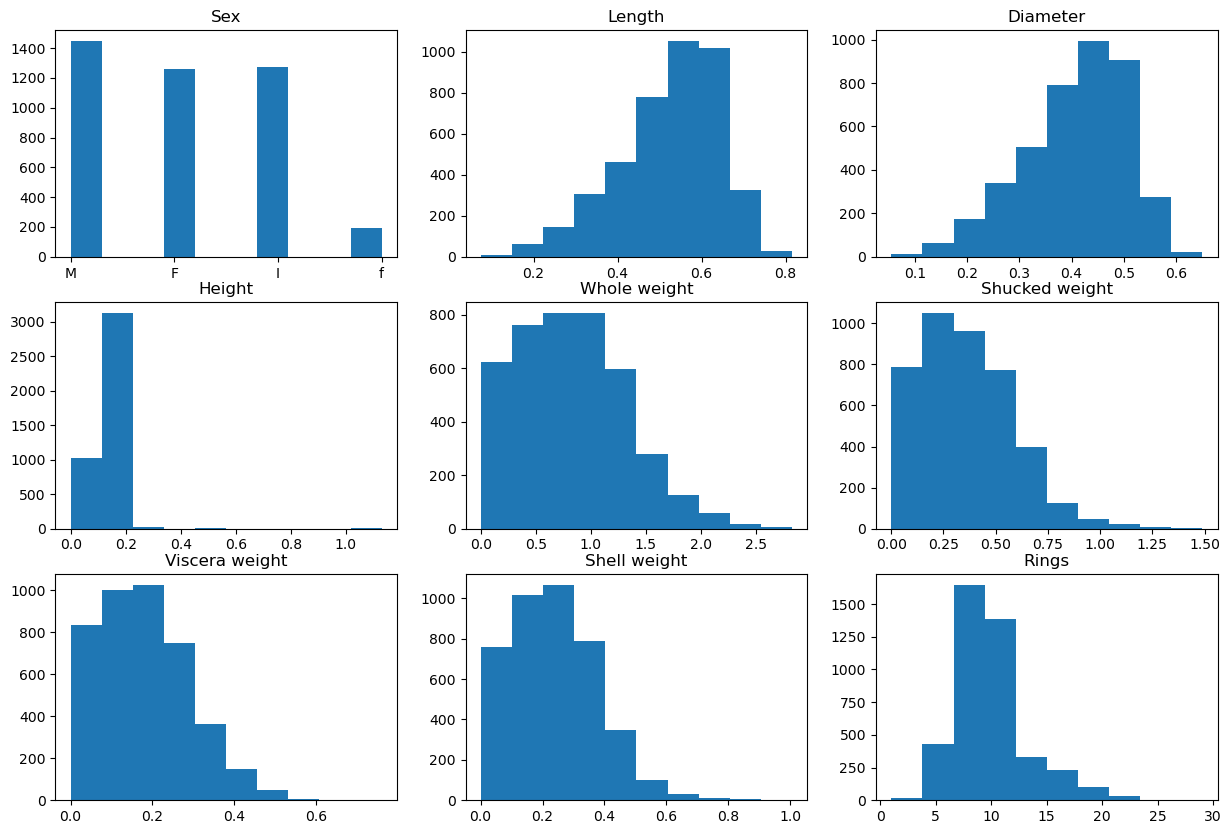

In [37]:
cnt = 0
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        plt.subplot(3,3, cnt+1) 
        plt.hist(df.iloc[:, cnt])
        plt.title(df.columns[cnt])
        cnt +=1

- Sex в датасете представлен пости равномерно, с небольшим перевесом больше представителей мужского пола. Ненамного меньше всех инфантов. Выявлено, что около 200 значений некорректно названы - переименую их;
- Lenght и Diameter имеют скошенное влево распределение, диапозон значений  от 0.1 до 0.8
- Height в основном большинство значений находится в диапазоне от 0 до 0.2. Очевидно, что 0 - ошибочное значение, его надо удалить, а значения больше 0.2  -  выбросы - их также можно удалить.
- Whole weight, Shuckes weight, Viscera weight, Shell weight - распределение имеют распределение скошенное вправо

In [49]:
df = df.replace('f','F')

In [54]:
#Проверю количество значений равных 0
for i in df.columns:
    print(i, len(df[df[i]==0]))

Sex 0
Length 0
Diameter 0
Height 2
Whole weight 0
Shucked weight 0
Viscera weight 0
Shell weight 0
Rings 0


In [61]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


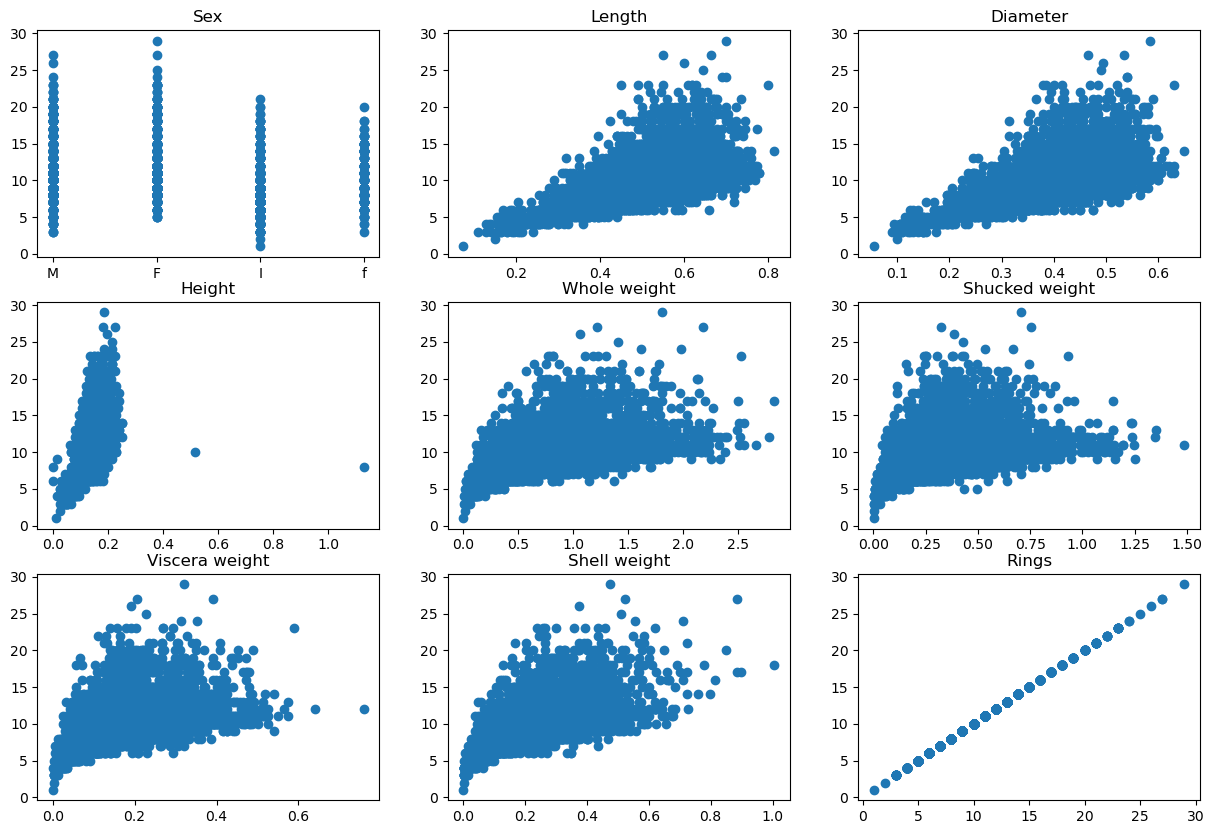

In [66]:
cnt = 0
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        plt.subplot(3,3, cnt+1) 
        plt.scatter(df.iloc[:, cnt], df['Rings'])
        plt.title(df.columns[cnt])
        cnt +=1

In [63]:
#Удалю тяжелые хвосты в скошенных распределениях
df = df[(df['Height']!=0) & (df['Height']<=0.2)]
df = df[(df['Shucked weight']<=0.5)]
df = df[(df['Viscera weight']<=0.25)]
df = df[(df['Shell weight']<=0.32)]

По графикам можно сказать о наличии ярко выраженной зависимости с целевой переменной таких признаков как: Lenght, Diameter, weight. При удалении выбросов в Height также будет видна зависимость.

### ANOVA

Посчитаю корреляцию с помощью теста ANOVA категориальной переменной и целевой переменной.

In [70]:
category_group = df.groupby('Sex')['Rings'].apply(list)
Anova_results = f_oneway(*category_group)

In [71]:
Anova_results

F_onewayResult(statistic=317.08464570845643, pvalue=1.8545900446585218e-185)

Получен pvalue очень маленькое значение, близкое к нулю. Он меньше, чем 0.5. Значит, по тесту ANOVA зависимость между полом и числом колец есть.

### Корреляция Спирмана

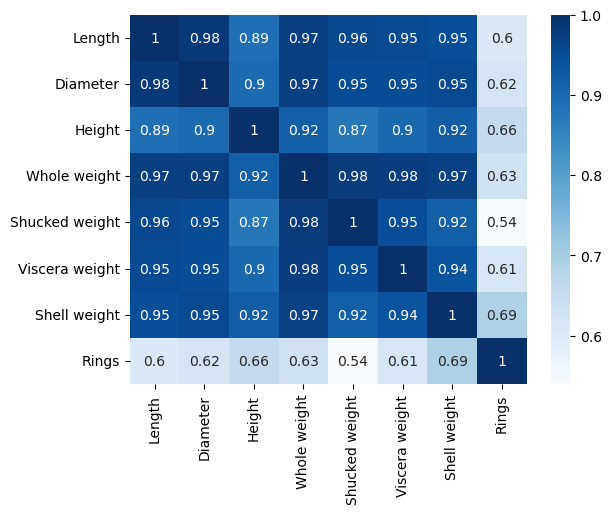

In [75]:
corr = df.iloc[:,1:].corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True);

По корреляции Спирмана видно, что признаки очень хорошо коррелируют между собой, и не так хорошо с целевой переменной. Это значит, что от ряда признаков можно отказаться, иначе модель может плохо обучиться. <br> 
Наибольшая корреляции с целевой переменной у Shell weight, наименьшая - Shuched weight. Shell weight имеет корреляцию близкую к 1 почти со всеми признаким. Значит, можно оставить только этот признак, остальные удалить.

### Анализ целевой переменной

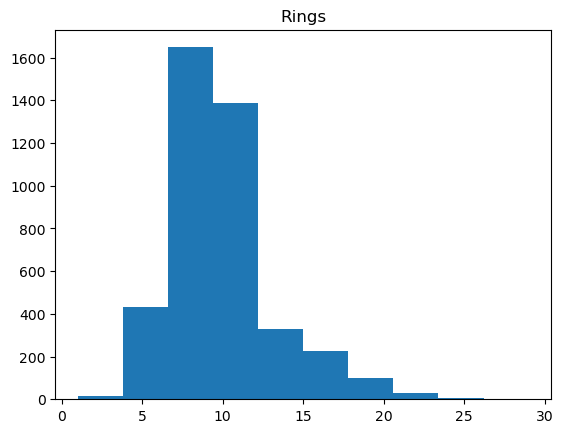

In [78]:
plt.hist(df['Rings'])
plt.title('Rings')
plt.show()

На гистограмме видно,что распределение далеко от нормального, оно скошено вправо. Наблюдатеся сильный дисбаланс классов, что может привести к тому что, что модель плохо обучится на редких значениях и практически не будет их предсказывать.

### Выводы
<br> В данных оказалось небольшое количество пропущенных значений - были удалены. У всех признаков логнормальное распределение - тяжелые хвосты слева или справа. Были удалены выбросы. Выявлены и удалены ошибочные значения - 0 в признаках Height, подкорректированы названия признаков.
<br> Все признаки имеют положительную корреляцию с целевой переменной и очень большая корреляция между собой - что очень плохо - рекомендовано при обучении модели использовать только один признак, наиболее коррелирующий с целевой переменной  - Shell weight.
<br> У целевой переменной выявлен сильный дисбаланс классов, что приведет к тому, что модель будет плохо предсказывать большие значений. Рекомандовано либо искусственно увеличить выборку, либо донабрать данные.

###  Сравнение pandas и polaris

Увеличу датасет до 1 млн строк

In [88]:
df = df.iloc[np.arange(len(df)).repeat(240)]

In [90]:
df.shape

(1002480, 9)

In [91]:
df.to_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone_2.csv')

In [95]:
%%time
df = pd.read_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone_2.csv')

CPU times: total: 594 ms
Wall time: 759 ms


,Unnamed: 0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
3,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
...,...,...,...,...,...,...,...,...,...,...
1002475,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12
1002476,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12
1002477,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12
1002478,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [102]:
%%time
df_pl = pl.read_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone_2.csv')

CPU times: total: 453 ms
Wall time: 92.3 ms


Polars  загрузил данные быстрее 422 мсек, Pandas - почти в два раза медленнее.

Сравню скорость фильтрации у Polars и Pandas

In [99]:
%%time
df[(df['Sex']=='M')&(df['Height']>0.5)]

CPU times: total: 93.8 ms
Wall time: 108 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
...,...,...,...,...,...,...,...,...,...
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10


In [103]:
%%time
df_pl.filter((pl.col('Sex')=='M')&(pl.col('Height')>0.5))

CPU times: total: 0 ns
Wall time: 31.3 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
i64,str,f64,f64,f64,f64,f64,f64,f64,i64
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
…,…,…,…,…,…,…,…,…,…
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10


Скорость фильтрации у Polars намного выше, в три раза быстрее Pandas

Сравню скорость аггрегации у двух библиотек

In [107]:
%%time
df.groupby('Sex').agg({'Length':'mean', 'Diameter':'mean', 'Height':'mean', 'Shucked weight':'mean','Whole weight':'max', 'Shell weight':'mean'})

CPU times: total: 31.2 ms
Wall time: 113 ms


,Length,Diameter,Height,Shucked weight,Whole weight,Shell weight
Sex,,,,,,
F,0.578828,0.454207,0.158018,0.445328,2.6570,0.301868
I,0.427273,0.325737,0.107931,0.190446,2.0495,0.128035
M,0.560059,0.438339,0.150847,0.429882,2.7795,0.279888
f,0.535205,0.417037,0.142667,0.386469,2.8255,0.251617


In [111]:
%%time
df_pl.group_by('Sex').agg([pl.mean('Length'), pl.mean('Diameter'), pl.mean('Height'), pl.mean('Shucked weight'),pl.max('Whole weight'), pl.mean('Shell weight')])

CPU times: total: 109 ms
Wall time: 69.5 ms


Sex,Length,Diameter,Height,Shucked weight,Whole weight,Shell weight
str,f64,f64,f64,f64,f64,f64
"""F""",0.578828,0.454207,0.158018,0.445328,2.657,0.301868
"""f""",0.535205,0.417037,0.142667,0.386469,2.8255,0.251617
"""M""",0.560059,0.438339,0.150847,0.429882,2.7795,0.279888
"""I""",0.427273,0.325737,0.107931,0.190446,2.0495,0.128035


In [114]:
%%time

q = (
    df_pl
    .lazy()
    .group_by(by='Sex')
    .agg(
        [
           pl.mean('Length'),
            pl.mean('Diameter'), 
            pl.mean('Height'), 
            pl.mean('Shucked weight'),
            pl.max('Whole weight'), 
            pl.mean('Shell weight')
        ]
    )
)

CPU times: total: 0 ns
Wall time: 0 ns


In [116]:
%%time

q.collect()

CPU times: total: 125 ms
Wall time: 44.7 ms


by,Length,Diameter,Height,Shucked weight,Whole weight,Shell weight
str,f64,f64,f64,f64,f64,f64
"""M""",0.560059,0.438339,0.150847,0.429882,2.7795,0.279888
"""F""",0.578828,0.454207,0.158018,0.445328,2.657,0.301868
"""f""",0.535205,0.417037,0.142667,0.386469,2.8255,0.251617
"""I""",0.427273,0.325737,0.107931,0.190446,2.0495,0.128035


Лучший результат показал Polars - 44.7 мсек. Pandas оказалася медленнее больше чем в два раза..